<a href="https://colab.research.google.com/github/Aujasvi-Sulekh/Malaria-prediction/blob/master/Malaria_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Malaria Disease Prediction Model. Members:
*   1905559 - Amit Kumar
*   1905561 - ChandraShekhar Dhakad
*   1905564 - Aujasvi Sulekh
*   1905566 - Shrish Sharan

##Google Drive

In [ ]:
# To access google drive from colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To Revoke access from google drive
from google.colab import drive
drive.flush_and_unmount()

##Libraries

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
# Importing functions from layers library
from tensorflow.keras.layers import Dense, Flatten

# Import Models from tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

# Importing InceptionV3 model for Transfer learning
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Importing libraries for data pre=processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# Importing Utility libraries
import numpy as np
from glob import glob
import cv2
from os import listdir
import matplotlib.pyplot as plt

##Data Pre-Processing

In [ ]:
# Path to Train-Val-Test directories
# Here the data is split 7:2:1 ratio for Train-Valid-Test
train_dir = '/content/drive/MyDrive/TnT_Lab_Project/Dataset/train'
valid_dir = '/content/drive/MyDrive/TnT_Lab_Project/Dataset/val'
test_dir = '/content/drive/MyDrive/TnT_Lab_Project/Dataset/test'

Parasitized Cell:


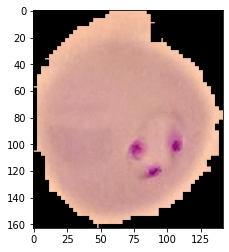

In [ ]:
img = image.load_img('/content/drive/MyDrive/TnT_Lab_Project/Dataset/train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')
print('Parasitized Cell:')
plt.imshow(img)

In [ ]:
cv2.imread('/content/drive/MyDrive/TnT_Lab_Project/Dataset/train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png').shape

(163, 142, 3)

Uninfected Cell:


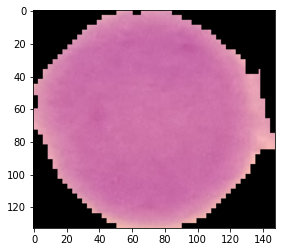

In [ ]:
img1 = image.load_img('/content/drive/MyDrive/TnT_Lab_Project/Dataset/train/Uninfected/C12NThinF_IMG_20150614_124212_cell_111.png')
print('Uninfected Cell:')
plt.imshow(img1)

In [ ]:
cv2.imread('/content/drive/MyDrive/TnT_Lab_Project/Dataset/train/Uninfected/C12NThinF_IMG_20150614_124212_cell_111.png').shape

(133, 148, 3)

In [ ]:
# To get number of output classes
folders = glob('/content/drive/MyDrive/TnT_Lab_Project/Dataset/train/*')
print('No. of Output Classes are:', len(folders))

No. of Output Classes are: 2


In [ ]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Importing images from Training Dataset
Train_set = train_datagen.flow_from_directory( train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2800 images belonging to 2 classes.


In [ ]:
# Importing images from Validation Dataset
Validation_set = datagen.flow_from_directory( valid_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 800 images belonging to 2 classes.


In [ ]:
# Importing images from Test Dataset
Test_set = datagen.flow_from_directory( test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 400 images belonging to 2 classes.


In [ ]:
# To Check Output Classes
out = Train_set.class_indices
out

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
Image_size = [224, 224]

##Implementing InceptionV3 using Transfer Learning

In [ ]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of the model
# Here we will be using imagenet weights

inception = InceptionV3(input_shape = Image_size + [3], weights='imagenet', include_top=False)


87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
# We are training our model in imagenet weights so we don't use pre-existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# Flatten is used to flatten the input data processed through the model to match the dimension of the output layer
inc = Flatten()(inception.output)

In [ ]:
# Dense is used to create a hidden network layer fully connected to the CNN model
inc_pred = Dense(len(folders), activation='softmax')(inc)

# Finalizing the model with input and output.
inc_model = Model(inputs = inception.input, outputs = inc_pred)

# The Structure of the model
inc_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# Since the data has a categorical class mode with use Categorical_crossentropy for loss function
# Adam for optimizer as it is recommended for by keras to get the best performance
inc_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Fitting our Model.
# Batch - size is 32
model_fit = inc_model.fit(
  Train_set,
  validation_data = Validation_set,
  epochs=15,
  steps_per_epoch = len(Train_set),
  validation_steps = len(Validation_set)
)

Epoch 1/15
88/88 [==============================] - 474s 5s/step - loss: 1.8540 - accuracy: 0.8093 - val_loss: 0.6803 - val_accuracy: 0.8963
Epoch 2/15
88/88 [==============================] - 43s 491ms/step - loss: 1.0117 - accuracy: 0.8664 - val_loss: 0.7188 - val_accuracy: 0.9075
Epoch 3/15
88/88 [==============================] - 44s 502ms/step - loss: 0.7482 - accuracy: 0.8871 - val_loss: 0.6097 - val_accuracy: 0.9050
Epoch 4/15
88/88 [==============================] - 42s 478ms/step - loss: 0.7197 - accuracy: 0.8914 - val_loss: 0.8662 - val_accuracy: 0.8675
Epoch 5/15
88/88 [==============================] - 44s 497ms/step - loss: 0.6383 - accuracy: 0.9000 - val_loss: 1.1869 - val_accuracy: 0.8600
Epoch 6/15
88/88 [==============================] - 42s 481ms/step - loss: 0.8245 - accuracy: 0.8900 - val_loss: 0.7888 - val_accuracy: 0.9162
Epoch 7/15
88/88 [==============================] - 43s 492ms/step - loss: 0.9639 - accuracy: 0.8943 - val_loss: 0.7475 - val_accuracy: 0.9187
E

##Loss on Known and Unknown Data

In [ ]:
# Evaluating the model we created
# Fininding loss and accuracy of Test Set
loss1, accuracy1 = inc_model.evaluate(Train_set)

print("Loss on Train Dataset: ", loss1)
print("Accuracy on Train Dataset: ", accuracy1)

88/88 [==============================] - 41s 464ms/step - loss: 0.5639 - accuracy: 0.9400
Loss on Train Dataset:  0.5639161467552185
Accuracy on Train Dataset:  0.9399999976158142


In [ ]:
loss2, accuracy2 = inc_model.evaluate(Validation_set)

print("Loss on Validation Dataset: ", loss2)
print("Accuracy on Validation Dataset: ", accuracy2)

25/25 [==============================] - 3s 112ms/step - loss: 1.0581 - accuracy: 0.9100
Loss on Validation Dataset:  1.0581047534942627
Accuracy on Validation Dataset:  0.9100000262260437


In [ ]:
loss3, accuracy3 = inc_model.evaluate(Test_set)

print("Loss on Test Dataset: ", loss3)
print("Accuracy on Test Dataset: ", accuracy3)

13/13 [==============================] - 76s 6s/step - loss: 0.8748 - accuracy: 0.9100
Loss on Test Dataset:  0.8747867345809937
Accuracy on Test Dataset:  0.9100000262260437


##Visualization

In [ ]:
history_dict = model_fit.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

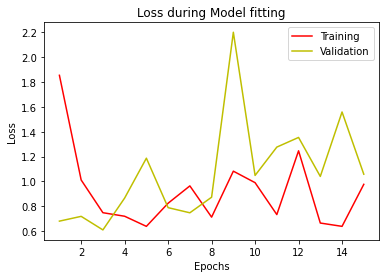

In [ ]:
plt.plot(epochs, loss, 'r', label='Training')
plt.plot(epochs, val_loss, 'y', label='Validation')
plt.title('Loss during Model fitting')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

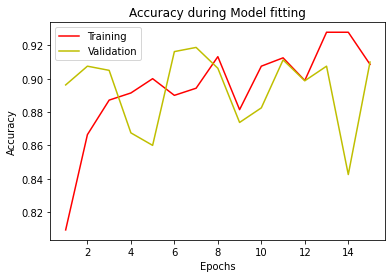

In [ ]:
plt.plot(epochs, acc, 'r', label='Training')
plt.plot(epochs, val_acc, 'y', label='Validation')
plt.title('Accuracy during Model fitting')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

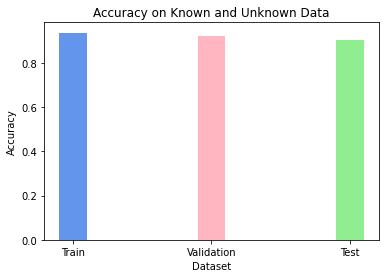

In [ ]:
plt.bar('Train', accuracy1, color = 'cornflowerblue', width = 0.2, align = 'center')
plt.bar('Validation', accuracy2, color = 'lightpink', width = 0.2, align = 'center')
plt.bar('Test', accuracy3, color = 'lightgreen', width = 0.2, align = 'center')
plt.title('Accuracy on Known and Unknown Data')
plt.ylabel('Accuracy')
plt.xlabel('Dataset')
plt.show()

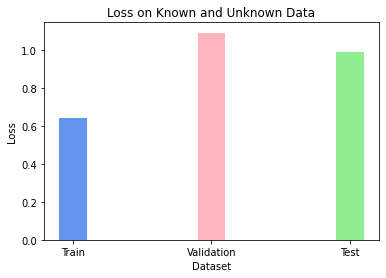

In [ ]:
plt.bar('Train', loss1, color = 'cornflowerblue', width = 0.2, align = 'center')
plt.bar('Validation', loss2, color = 'lightpink', width = 0.2, align = 'center')
plt.bar('Test', loss3, color = 'lightgreen', width = 0.2, align = 'center')
plt.title('Loss on Known and Unknown Data')
plt.ylabel('Loss')
plt.xlabel('Dataset')
plt.show()

##Prediction on Test DataSet

In [ ]:
# Predicting on Test data
y_pred = inc_model.predict(Test_set)
y_pred[:20]

array([[4.7897256e-11, 1.0000000e+00],
       [1.0000000e+00, 2.6377578e-14],
       [9.9973565e-01, 2.6432428e-04],
       [1.0000000e+00, 3.5400895e-16],
       [5.9814833e-17, 1.0000000e+00],
       [1.5487713e-05, 9.9998450e-01],
       [2.2683286e-13, 1.0000000e+00],
       [2.2256178e-13, 1.0000000e+00],
       [6.0979874e-11, 1.0000000e+00],
       [1.2824710e-19, 1.0000000e+00],
       [9.9986744e-01, 1.3248895e-04],
       [1.0000000e+00, 7.5070342e-19],
       [3.8692681e-07, 9.9999964e-01],
       [7.3055906e-15, 1.0000000e+00],
       [5.2128849e-17, 1.0000000e+00],
       [9.9999857e-01, 1.3959078e-06],
       [2.5971961e-17, 1.0000000e+00],
       [1.0535362e-02, 9.8946464e-01],
       [8.6022069e-09, 1.0000000e+00],
       [1.0000000e+00, 1.1753284e-17]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
print('No. of Data predicted:',len(y_pred))

No. of Data predicted: 400


##Testing the Trained model with particular Data

In [ ]:
print('The Output classes with Indices are:',out)

The Output classes with Indices are: {'Parasitized': 0, 'Uninfected': 1}


###To Extract the Model as .h5 file

In [ ]:
from tensorflow.keras.models import load_model
inc_model.save('model_inception.h5')

In [ ]:
model=load_model('model_inception.h5')

###Testing the Model with Parasitized data

In [ ]:
img_1 = image.load_img('/content/drive/MyDrive/TnT_Lab_Project/Dataset/test/Parasitized/C33P1thinF_IMG_20150619_120804a_cell_224.png',target_size=(224,224))

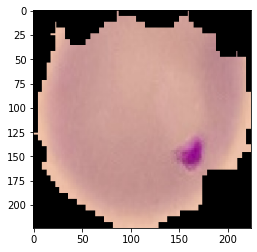

In [ ]:
plt.imshow(img_1)

In [ ]:
arr_1 = image.img_to_array(img_1)

In [ ]:
arr_1.shape

(224, 224, 3)

In [ ]:
arr_1 = np.expand_dims(arr_1, axis=0)
img_data_1 = preprocess_input(arr_1)
img_data_1.shape

(1, 224, 224, 3)

In [ ]:
pred_1 = model.predict(img_data_1)
pred_1

array([[0.99840504, 0.00159498]], dtype=float32)

In [ ]:
fin_1 = np.argmax(pred_1, axis=1)
fin_1

array([0])

In [ ]:
if(fin_1==0):
  print('Patient is Infected with Malaria')
else:
  print('Patient is Not Infected with Malaria')

Patient is Infected with Malaria


###Testing the Model with Uninfected Data

In [ ]:
img_2 = image.load_img('/content/drive/MyDrive/TnT_Lab_Project/Dataset/test/Uninfected/C12NThinF_IMG_20150614_124244_cell_109.png',target_size=(224,224))

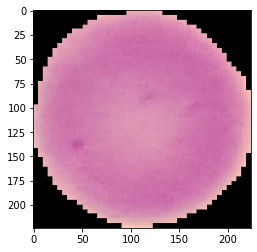

In [ ]:
plt.imshow(img_2)

In [ ]:
arr_2 = image.img_to_array(img_2)

In [ ]:
arr_2.shape

(224, 224, 3)

In [ ]:
arr_2 = np.expand_dims(arr_2, axis=0)
img_data_2 = preprocess_input(arr_2)
img_data_2.shape

(1, 224, 224, 3)

In [ ]:
pred_2 = model.predict(img_data_2)
pred_2

array([[7.757373e-25, 1.000000e+00]], dtype=float32)

In [ ]:
fin_2 = np.argmax(pred_2, axis=1)
fin_2

array([1])

In [ ]:
if(fin_2==0):
  print('Patient is Infected with Malaria')
else:
  print('Patient is Not Infected with Malaria')

Patient is Not Infected with Malaria
